### POLYNOMIAL REGRESSION

+ Non-Linear Relationship Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [22]:
def plot_the_figure(X_array, y_array):
    
    plt.figure(figsize = (15,7))
    plt.scatter(X_array, y_array)
    plt.show()

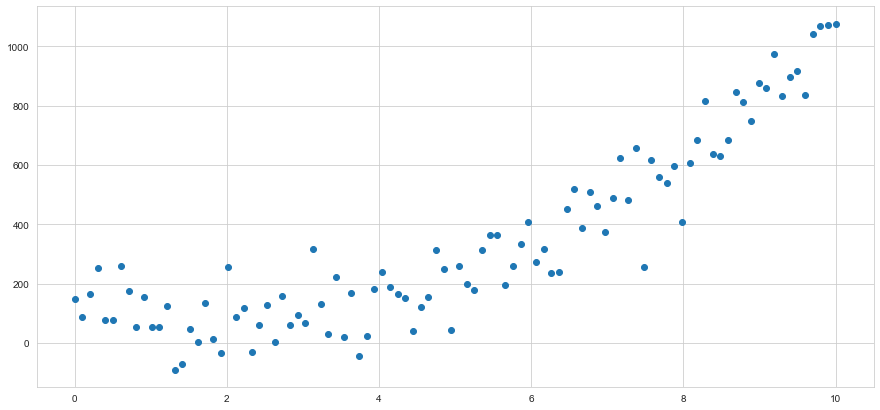

In [23]:
## preparing X and y

np.random.seed(42)
n_samples = 100

X = np.linspace(0,10,100)
## noise
rng = np.random.randn(n_samples) * 100
y = X ** 3 + rng + 100

## plot the distribution
plot_the_figure(X,y)

Linear Regression Model and its R2 Score

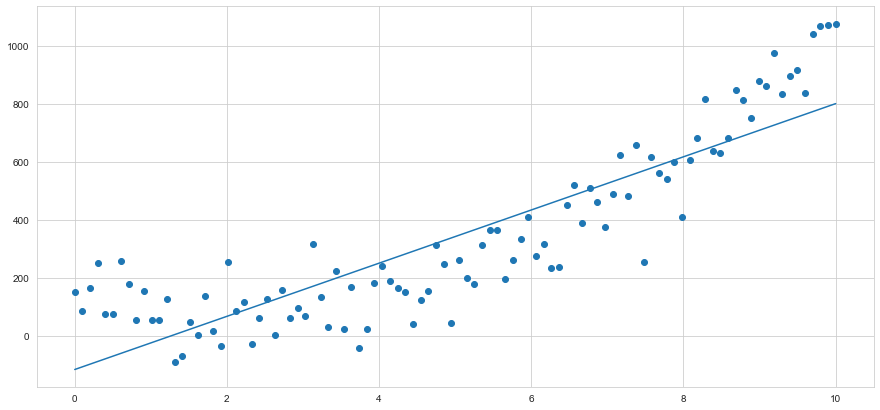

The R2 Score is given by :-- 0.7643394574930141


In [26]:
## preparing the models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## define model
lin_reg = LinearRegression()
## fit the model 
lin_reg.fit(X.reshape(-1,1),y)
## predict the model
lin_reg_pred = lin_reg.predict(X.reshape(-1,1))

##plot the curve
plt.figure(figsize = (15,7))
plt.scatter(X,y)
plt.plot(X, lin_reg_pred)
plt.show()

print("The R2 Score is given by :--", r2_score(y, lin_reg_pred))

Polynomial Regression Model

In [49]:
## polynomial model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))
degree_three = PolynomialFeatures(degree = 3)
X_poly_3 = degree_three.fit_transform(X.reshape(-1,1))

***

How Polynomial Regression works

In [50]:
print("The Given Data :--",X[:5])
print("The Data of Degree two Polynomial function :--",X_poly[:5])
print("The Data of Degree three Polynomial function :--", X_poly_3[:5])

The Given Data :-- [0.        0.1010101 0.2020202 0.3030303 0.4040404]
The Data of Degree two Polynomial function :-- [[1.         0.         0.        ]
 [1.         0.1010101  0.01020304]
 [1.         0.2020202  0.04081216]
 [1.         0.3030303  0.09182736]
 [1.         0.4040404  0.16324865]]
The Data of Degree three Polynomial function :-- [[1.         0.         0.         0.        ]
 [1.         0.1010101  0.01020304 0.00103061]
 [1.         0.2020202  0.04081216 0.00824488]
 [1.         0.3030303  0.09182736 0.02782647]
 [1.         0.4040404  0.16324865 0.06595905]]


In [52]:
data = np.array([0,1,2,3,4,5])
data_2 = poly_reg.fit_transform(data.reshape(-1,1))
data_3 = degree_three.fit_transform(data.reshape(-1,1))
print("The Given Data :--",data)
print("The Data of Degree two Polynomial function :--", data_2)
print("The Data of Degree three Polynomial function :--",data_3)

The Given Data :-- [0 1 2 3 4 5]
The Data of Degree two Polynomial function :-- [[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
The Data of Degree three Polynomial function :-- [[  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


*****

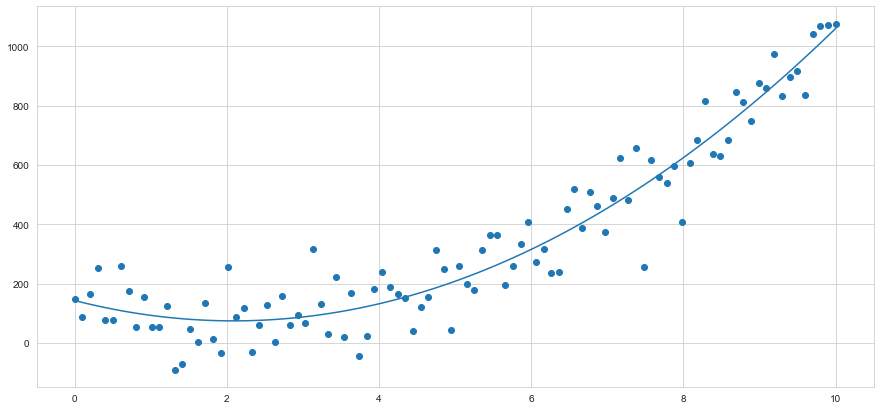

The R2 Score of the Model that fits with Polynomial Function :-- 0.9173858308909386


In [62]:
## polynomial model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1,1))
y_predict = lin_reg_2.predict(X_poly)

plt.figure(figsize = (15,7))
plt.scatter(X,y)
plt.plot(X, y_predict)
plt.show()

print("The R2 Score of the Model that fits with Polynomial Function :--", r2_score(y, y_predict))

+ This Model fits the Data more than the Linear Model.

### Polynomial Regression on Boston Dataset.

In [64]:
from sklearn.datasets import load_boston

## get the data
boston_data = load_boston()
print(boston_data.keys())
data = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
data["MEDV"] = boston_data.target
data.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
pd.options.display.float_format = "{:,.2f}".format
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


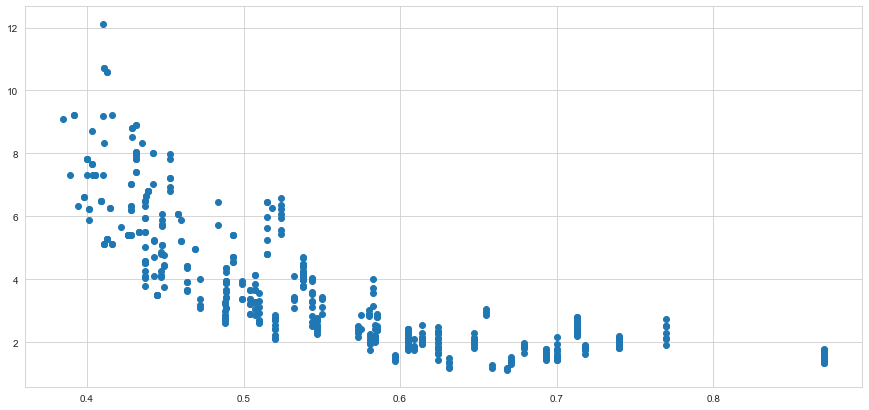

In [71]:
## from the above correlation matrix.
## the attributes "DIS" and "NOX" are negatively correlated.
X_data = data["NOX"].values
y_data = data["DIS"].values

plt.figure(figsize = (15,7))
plt.scatter(X_data, y_data)
plt.show()


Linear Regression

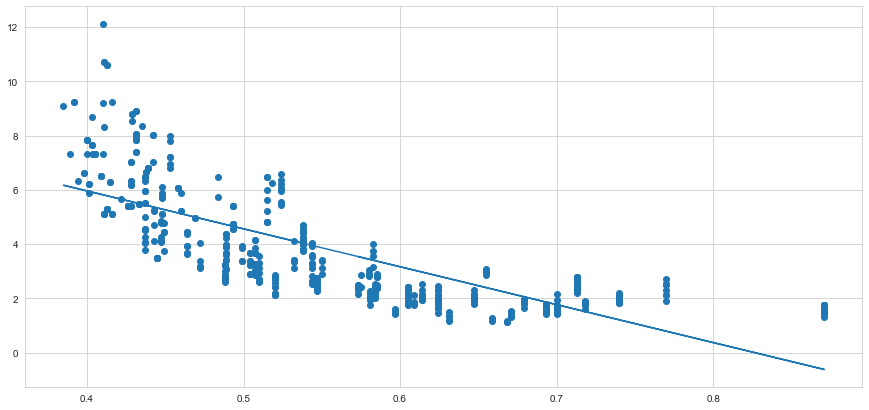

The R2 Score of the Linear Regression Model -  0.59171496709342


In [87]:
## define the linear regression and find the r2 score
linear_regression = LinearRegression()
## fit the mdoel using the X and y dataset with reshaping.
linear_regression.fit(X_data.reshape(-1,1), y_data)
## predict the model using the X_data which is traininig data
linear_regression_predict = linear_regression.predict(X_data.reshape(-1,1))

## plotting the linear regression model
plt.figure(figsize = (15,7))
plt.scatter(X_data, y_data)
plt.plot(X_data,linear_regression_predict)
plt.show()

print("The R2 Score of the Linear Regression Model - ", r2_score(y_data, linear_regression_predict))
#X_data.reshape(-1,1)
#y_data.reshape(-1,1)

Polynomial Quadratic Model Regression

R^2 score = 0.74


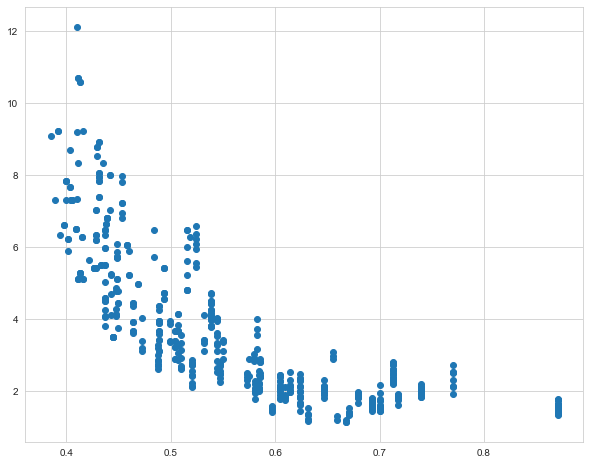

In [122]:
quadratic_regression = PolynomialFeatures(degree = 2)
## ft the model.
quadratic_regression_fit = quadratic_regression.fit_transform(X_data.reshape(-1,1))

## define linear Model again
linear_regression_2 = LinearRegression()
linear_regression_2.fit(quadratic_regression_fit, y_data)

## preparing the X_fit by taking min and max
X_fit = np.linspace(X_data.min(), X_data.max(), 1)[:, np.newaxis]
X_fit

y_pred = linear_regression_2.predict(quadratic_regression.fit_transform(X_fit.reshape(-1,1)))

## plotting the 
plt.figure(figsize=(10,8));
plt.scatter(X_data, y_data);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_data, linear_regression_2.predict(quadratic_regression_fit))))

In [123]:
np.linspace(0.385,0.871,1)

array([0.385])

In [118]:
np.arange(X_data.min(), X_data.max(), 10)

array([0.385])

In [120]:
X_data.max()

0.871

***

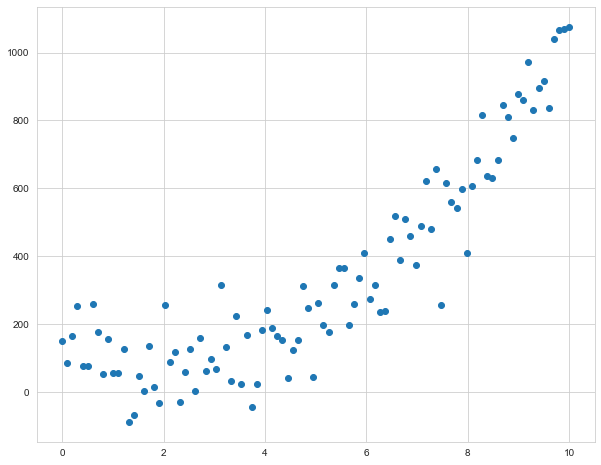

In [128]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + 100 + rng

plt.figure(figsize=(10,8));
plt.scatter(X, y);

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Linear Regression

0.7643394574930141


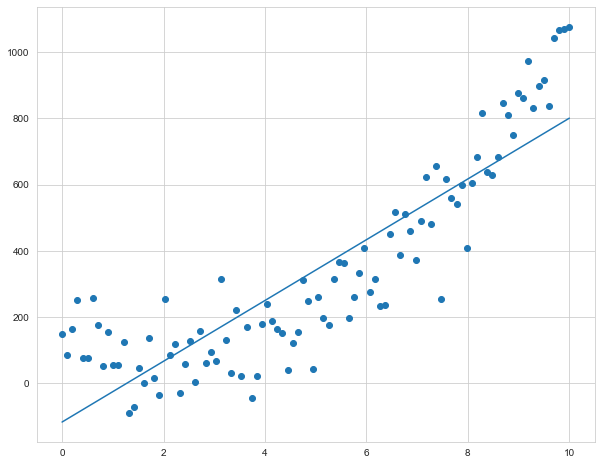

In [130]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

Polynomial

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [133]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


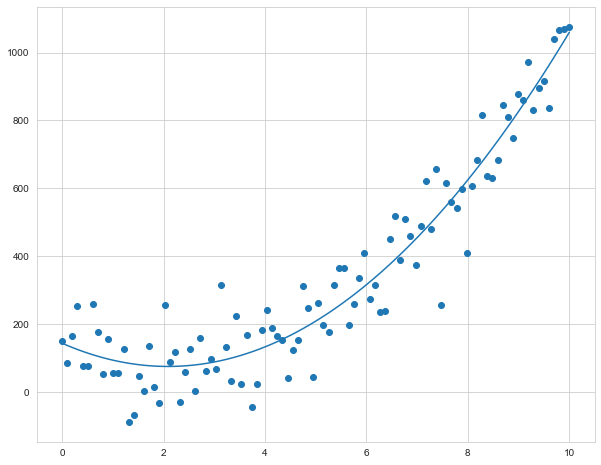

In [134]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

In [138]:
from sklearn.datasets import load_boston

## get the data
boston_data = load_boston()
print(boston_data.keys())
df_boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df_boston["MEDV"] = boston_data.target
df_boston.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [139]:
pd.options.display.float_format = "{:,.2f}".format
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [140]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

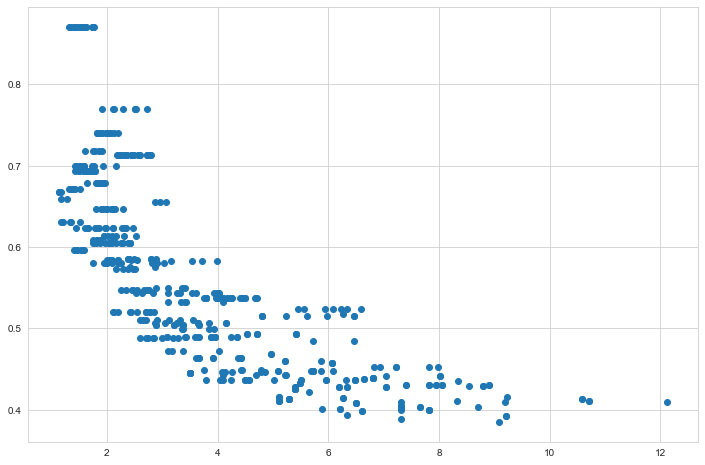

In [141]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

R^2 score = 0.59


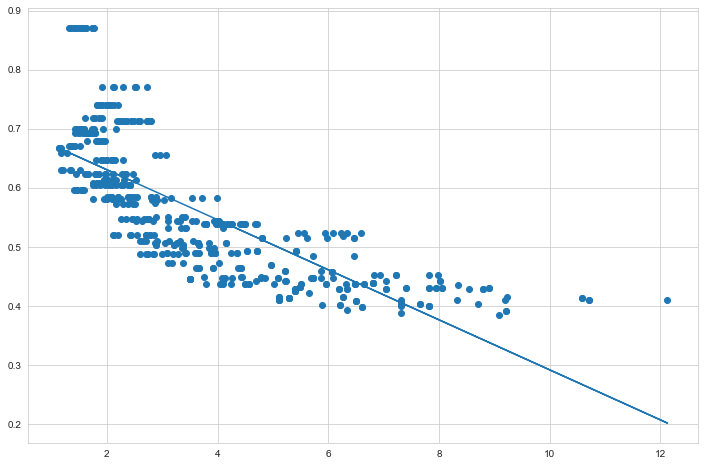

In [142]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))

plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

In [143]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

In [144]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression()

In [145]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [146]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [147]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.70


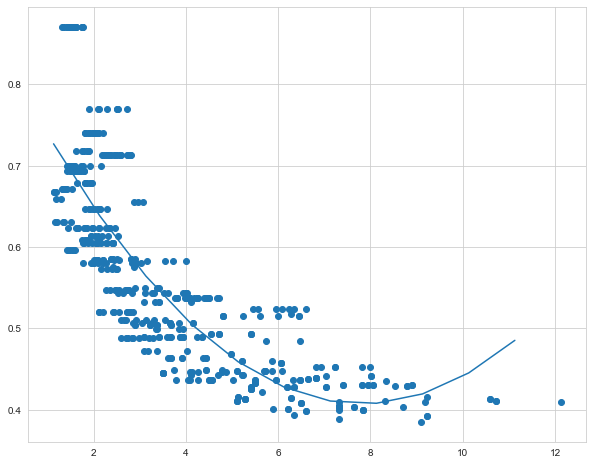

In [148]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_2.predict(X_poly_b))))

In [149]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [150]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression()

In [151]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [152]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [153]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.71


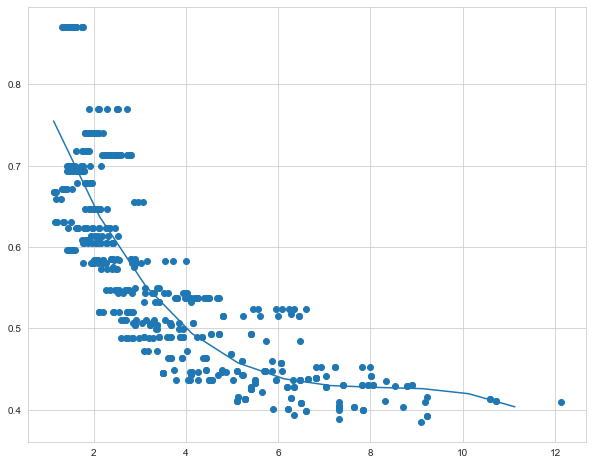

In [154]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))